In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from statistics import mode

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/BeerDataScienceProject.csv",encoding='latin-1')
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [ ]:
print(df.shape)

(528870, 13)


In [ ]:
print(df.isnull().sum())

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64


# 1.	Rank top 3 Breweries which produce the strongest beers?

The dataset have beer_ABV attribute  which tells the strength of the beer. Beer_ABV tells Alcohol by volume percentage. Higher the value stronger is the beer.

In [ ]:
df1 = df[pd.notnull(df['beer_ABV'])]

In [ ]:
df1.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


There are 20280 rows in the dataset where beer_ABV is null. For these rows we can’t make a decision about the beer strength.
Rows having null as beer_ABV value is dropped.

In [ ]:
print(df1.shape)

(508590, 13)


In [ ]:
print(df1.isnull().sum())

beer_ABV                0
beer_beerId             0
beer_brewerId           0
beer_name               0
beer_style              0
review_appearance       0
review_palette          0
review_overall          0
review_taste            0
review_profileName    115
review_aroma            0
review_text           117
review_time             0
dtype: int64


In [ ]:
df1['beer_brewerId'].unique().shape

(1607,)

New table is sorted in descending order based on beer_ABV values.
First Three unique brewers Id are extracted from sorted table.

In [ ]:
df1 = df1.sort_values(["beer_ABV"], ascending=False)

In [ ]:
df1.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12913,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,4.5,4.5,4.0,4.0,kappldav123,4.5,The new world strongest beer - I thing it will...,1264684153


In [ ]:
print(df1['beer_brewerId'])

12889     6513
12909     6513
12910     6513
12911     6513
12913     6513
          ... 
120120     302
120129     302
274878    2444
274879    2444
274880    2444
Name: beer_brewerId, Length: 508590, dtype: int64


In [ ]:
brewersList=df1['beer_brewerId'].tolist()

In [ ]:
topThree=[]
topThree.append(brewersList[0])
cur=brewersList[0]
count=1
i=1
while count<3:
    if cur!=brewersList[i]:
        count=count+1
        topThree.append(brewersList[i])
        cur=brewersList[i]
    i=i+1
print("Rank top 3 Breweries which produce the strongest beers?")
print(topThree)

Rank top 3 Breweries which produce the strongest beers?
[6513, 35, 16866]


#2.	Which year did beers enjoy the highest ratings? 

The dataset have review_time attribute which tells the time of review. Although the format is not clear so extracting year is difficult.

In [ ]:
df2=df.sort_values(["review_appearance","review_palette","review_overall","review_taste","review_aroma"], ascending=False)
df2.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
433,6.1,10784,1075,Caldera IPA,American IPA,5.0,5.0,5.0,5.0,vicsju1991,5.0,12 oz can poured into duvel snifter A - pours ...,1325980456
1712,5.3,16491,1454,T.J.'s Best Bitter,English Bitter,5.0,5.0,5.0,5.0,shbobdb,5.0,Holy crap. This beer is amazing. Wow. Holy cra...,1182392570
1751,5.5,15660,1454,Wobbly Bob APA,American Pale Ale (APA),5.0,5.0,5.0,5.0,908carson,5.0,My first and only perfect score. I'm not sure ...,1288538410
2113,4.5,1557,577,Black Cuillin,Scottish Ale,5.0,5.0,5.0,5.0,dennis,5.0,Roasted oatmeal and honey. Thick dark but not ...,1000848115
2380,4.8,61800,16859,Blonde Ambition,American Blonde Ale,5.0,5.0,5.0,5.0,cstrong821,5.0,"A- great golden color, light foam. S- somewhat...",1313808291


The table is sorted in descending order based on all rating parameters- "review_appearance","review_palette","review_overall","review_taste","review_aroma". Review_time of the first row is returned as answer.

In [ ]:
df2.shape

(528870, 13)

In [ ]:
print("Which year did beers enjoy the highest ratings?")
topTime=df2["review_time"].tolist()
print(topTime[0])

Which year did beers enjoy the highest ratings?
1325980456


#3.Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

•	Dataset contains reviews of bears based on different parameters such as taste, aroma, appearance, and palette which can contain any value between 1 to 5

In [ ]:
df3=df[["review_appearance","review_palette","review_taste","review_aroma","review_overall"]]
df3.head()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
0,2.5,2.0,1.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.5,3.0,2.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0


In [ ]:
x3=df3[["review_appearance","review_palette","review_taste","review_aroma"]]
y3=df3["review_overall"]

In [ ]:
x3.head()

,review_appearance,review_palette,review_taste,review_aroma
0,2.5,2.0,1.5,1.5
1,3.0,2.5,3.0,3.0
2,3.0,2.5,3.0,3.0
3,3.5,3.0,2.5,3.0
4,4.0,4.5,4.0,4.5


In [ ]:
y3.head()

0    1.5
1    3.0
2    3.0
3    3.0
4    4.0
Name: review_overall, dtype: float64

All the 4 factors taste, aroma, appearance, and palette are considered as input parameters. We will try to predict overall review based on these parameters.
Decision Tree algorithm is used to assign weights to these different parameters because Decision Tree algorithm by its nature uses scores such as entropy to get results based on different input parameters. DecisionTree regressor is used to produce output since overall_rating can have any real number between [1,5] as its output.


In [ ]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x3, y3)
importance = dtmodel.feature_importances_

In [ ]:
attributes=["review_appearance","review_palette","review_taste","review_aroma"]
print("Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?")
for col,imp in enumerate(importance):
    print(attributes[col],imp)

Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
review_appearance 0.00794763483714918
review_palette 0.006345439086621306
review_taste 0.05496606697654546
review_aroma 0.9307408590996841


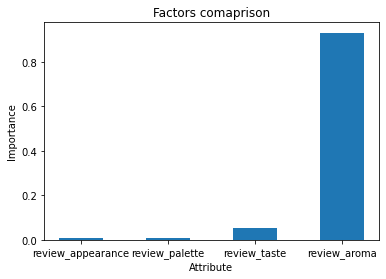

In [ ]:
import matplotlib.pyplot as plt
imprt=[]
for col,imp in enumerate(importance):
  imprt.append(imp)
plt.bar(attributes,imprt,width=0.5)
plt.xlabel("Attribute")
plt.ylabel("Importance")
plt.title("Factors comaprison")
plt.show()

#4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

There can be various factors on which beers can be suggested. For this assignment beer_ABV and beer_style is considered. A person can have a beer style preference or a person may like best strongest beer.

In [ ]:
df4=df[["beer_ABV","beer_beerId","beer_name","beer_style","review_overall"]]
df4.head()

,beer_ABV,beer_beerId,beer_name,beer_style,review_overall
0,5.0,47986,Sausa Weizen,Hefeweizen,1.5
1,6.2,48213,Red Moon,English Strong Ale,3.0
2,6.5,48215,Black Horse Black Beer,Foreign / Export Stout,3.0
3,5.0,47969,Sausa Pils,German Pilsener,3.0
4,7.7,64883,Cauldron DIPA,American Double / Imperial IPA,4.0


In [ ]:
print(df4["beer_style"].unique().size)
print(df4["beer_style"].unique())

104
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American Stout' 'Russian Imperial Stout' 'American Amber / Red Ale'
 'American Strong Ale' 'Märzen / Oktoberfest' 'American Adjunct Lager'
 'American Blonde Ale' 'American IPA' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'English Bitter' 'English Porter'
 'Irish Dry Stout' 'American Barleywine' 'Belgian Strong Pale Ale'
 'Doppelbock' 'Maibock / Helles Bock' 'Light Lager' 'Pumpkin Ale'
 'Dortmunder / Export Lager' 'Euro Strong Lager' 'Euro Dark Lager'
 'Low Alcohol Beer' 'Euro Pale Lager' 'Bock'
 'English India Pale Ale (IPA)' 'Altbier' 'Kölsch' 'Munich Dunkel Lager'
 'Rye Beer' 'American Pale Wheat Ale' 'Milk / Sweet Stout' 'Schwarzbier'
 'Vienna Lager' 'American Amber / Red Lager' 'Scottish Ale' 'Witbier'
 'Sa

Dataset is sorted in descending order based on overall review. Let’s take beer_style preference as “English Pale Ale”. From the sorted table only those rows are taken were beer_style is “English Pale Ale”. First three unique beer names are suggested.

In [ ]:
#Suggestion based on beer_style and overall rating
preferedStyle='English Pale Ale'
sortedbeer=df4.sort_values(["review_overall"], ascending=False)
sortedbeer.head()

,beer_ABV,beer_beerId,beer_name,beer_style,review_overall
338785,9.2,1696,Trappistes Rochefort 8,Dubbel,5.0
123522,9.0,19488,Sweetwater Happy Ending Imperial Stout,American Double / Imperial Stout,5.0
411322,7.5,15881,Tröegs Nugget Nectar,American Amber / Red Ale,5.0
247862,9.0,2512,Chimay Grande Réserve (Blue),Belgian Strong Dark Ale,5.0
180183,12.0,3833,AleSmith Speedway Stout,American Double / Imperial Stout,5.0


In [ ]:
beerStyle=sortedbeer.loc[sortedbeer['beer_style'] == preferedStyle]
beerStyle.head()

,beer_ABV,beer_beerId,beer_name,beer_style,review_overall
347682,5.00,10589,Tennoz Pale Ale,English Pale Ale,5.0
457102,5.35,3866,Casta Bruna (Pale Ale),English Pale Ale,5.0
457071,5.35,3866,Casta Bruna (Pale Ale),English Pale Ale,5.0
128331,5.00,46643,L'Antidote,English Pale Ale,5.0
36280,4.70,5761,Bateman's Combined Harvest,English Pale Ale,5.0


In [ ]:
topStyleBeer=[]
beerNames=beerStyle["beer_name"].tolist()
topStyleBeer.append(beerNames[0])
cur=beerNames[0]
count=1
i=1
while count<3:
    if cur!=beerNames[i]:
        count=count+1
        topStyleBeer.append(beerNames[i])
        cur=beerNames[i]
    i=i+1
print(topStyleBeer)

['Tennoz Pale Ale', 'Casta Bruna (Pale Ale)', "L'Antidote"]


For suggestion based on strength, Table is sorted based on beer_ABV and overall review. First three unique beer names are suggested.

In [ ]:
#Suggestion based on alcohol percentage and overall rating
alcoholsorted=df4.sort_values(['beer_ABV', 'review_overall'], ascending=False)
alcoholsorted.head()

,beer_ABV,beer_beerId,beer_name,beer_style,review_overall
12889,57.70,73368,Schorschbräu Schorschbock 57%,Eisbock,4.0
12909,43.00,57856,Schorschbräu Schorschbock 43%,Eisbock,4.0
12910,43.00,57856,Schorschbräu Schorschbock 43%,Eisbock,3.5
12913,39.44,55712,Schorschbräu Schorschbock 40%,Eisbock,4.0
12911,39.44,55712,Schorschbräu Schorschbock 40%,Eisbock,3.0


In [ ]:
topStrongBeer=[]
beerNames=alcoholsorted["beer_name"].tolist()
topStrongBeer.append(beerNames[0])
cur=beerNames[0]
count=1
i=1
while count<3:
    if cur!=beerNames[i]:
        count=count+1
        topStrongBeer.append(beerNames[i])
        cur=beerNames[i]
    i=i+1
print(topStrongBeer)

['Schorschbräu Schorschbock 57%', 'Schorschbräu Schorschbock 43%', 'Schorschbräu Schorschbock 40%']


#5.	Which Beer style seems to be the favorite based on reviews written by users?

Average is taken for all the review parameters such as "review_appearance","review_palette","review_overall","review_taste","review_aroma"

In [ ]:
df5=df[["review_appearance", "review_palette","review_overall","review_taste","review_aroma","beer_style"]]
df5["review_avg"]=df[["review_appearance", "review_palette","review_overall","review_taste","review_aroma"]].mean(axis=1)
df5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_appearance,review_palette,review_overall,review_taste,review_aroma,beer_style,review_avg
0,2.5,2.0,1.5,1.5,1.5,Hefeweizen,1.8
1,3.0,2.5,3.0,3.0,3.0,English Strong Ale,2.9
2,3.0,2.5,3.0,3.0,3.0,Foreign / Export Stout,2.9
3,3.5,3.0,3.0,2.5,3.0,German Pilsener,3.0
4,4.0,4.5,4.0,4.0,4.5,American Double / Imperial IPA,4.2


In [ ]:
df5=df5.sort_values(['review_avg'], ascending=False)
df5.head()

,review_appearance,review_palette,review_overall,review_taste,review_aroma,beer_style,review_avg
295989,5.0,5.0,5.0,5.0,5.0,Rye Beer,5.0
227021,5.0,5.0,5.0,5.0,5.0,Russian Imperial Stout,5.0
408704,5.0,5.0,5.0,5.0,5.0,American Wild Ale,5.0
281453,5.0,5.0,5.0,5.0,5.0,Vienna Lager,5.0
382713,5.0,5.0,5.0,5.0,5.0,Altbier,5.0


In [ ]:
topRating=df5.loc[df5['review_avg'] == 5.0]
print(df5.size)
print(topRating.size)

3702090
14070


Mode is calculated for beer styles with 5 start average review.

In [ ]:
topbeerStyle=topRating["beer_style"]
print(mode(topbeerStyle))

American Double / Imperial Stout


#7.	How to find similar beer drinkers by using written reviews only?  

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 3.8 MB 35.2 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 895 kB 55.6 MB/s 
     |████████████████████████████████| 6.5 MB 51.0 MB/s 
     |████████████████████████████████| 596 kB 62.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=241b51e908b0600a941580629ce9ae84317e6c53bf028baf23146e7c6978cd5e
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

There are 117 rows where review text is null these rows are dropped.
All the sentences are encoded using SBERT model

In [ ]:
df7=df[df["review_text"].notna()]

In [ ]:
print(df7.isnull().sum())

beer_ABV              20278
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text               0
review_time               0
dtype: int64


In [ ]:
textReviews=df7["review_text"].tolist()

In [ ]:
print(textReviews[1])

Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.


In [ ]:
embeddermodel = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
emb = embeddermodel.encode(textReviews)

K means clustering algorithm is used to label cluster similar reviews.

In [ ]:
clusters = 4
km = KMeans(n_clusters=clusters)
km.fit(emb)
labels = km.labels_

A list of clusters id is generated for each sentence

In [ ]:
print(labels)

[2 1 2 ... 2 3 3]
